# Project: Wrangling and Analyze Data

In [2]:
# Import statements 
import numpy as np
import pandas as pd
import json
import requests
import tweepy
from tweepy import OAuthHandler
import os
import time
from timeit import default_timer as timer
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Read the twitter archive from local storage.
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# View the info
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
# show the first 5 row on the dataset
df_twitter_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#create file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

# load the file into a dataframe
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# View the info of the prediction DataFrame
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
#Tweeter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

# Create an OAuthHandler instance
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_twitter_enhanced.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [8]:
# read tweet-json.txt line by line into a pandas DataFrame
tweet_list = []

json_file = open('tweet-json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

#Create a dataframe

tweet_df = pd.DataFrame()

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweet_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweet_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

In [9]:
# View the info of the tweet_df
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
full_text         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Dataset 1: WeRateDogs Twitter archive

In [10]:
# Visual assessment of the first dataset
df_twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# check the info 
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# the shape of the dataset
df_twitter_enhanced.shape

(2356, 17)

In [13]:
# Missing values
df_twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# Duplicated valuses
df_twitter_enhanced.duplicated().sum()

0

In [15]:
df_twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
df_twitter_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
# check names value count
df_twitter_enhanced.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Toby              7
Buddy             7
Daisy             7
an                7
Rusty             6
Leo               6
Stanley           6
Dave              6
Koda              6
Jax               6
Milo              6
Oscar             6
Bella             6
Jack              6
Scout             6
Larry             5
               ... 
unacceptable      1
Birf              1
Dutch             1
Napolean          1
Ferg              1
Snickers          1
Kevon             1
Bobble            1
Buddah            1
Mo                1
light             1
Lizzie            1
Cupid             1
Tripp             1
Rhino             1
Anthony           1
Kramer            1
Strudel           1
Ambrose           1


In [19]:
df_twitter_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df_twitter_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
df_twitter_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
df_twitter_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
# dogs that are both doggo and floofer
df_twitter_enhanced[(df_twitter_enhanced.doggo == "doggo") & (df_twitter_enhanced.floofer == "floofer")].shape

(1, 17)

In [24]:
# dogs that are both doggo and pupper
df_twitter_enhanced[(df_twitter_enhanced.doggo == "doggo") & (df_twitter_enhanced.pupper == "pupper")].shape

(12, 17)

In [25]:
# dogs that are both doggo and puppo
df_twitter_enhanced[(df_twitter_enhanced.doggo == "doggo") & (df_twitter_enhanced.puppo == "puppo")].shape

(1, 17)

In [26]:
# dogs that are both  floofer and pupper
df_twitter_enhanced[(df_twitter_enhanced.floofer == "floofer") & (df_twitter_enhanced.pupper == "pupper")].shape

(0, 17)

In [27]:
# dogs that are both  puppo and pupper
df_twitter_enhanced[(df_twitter_enhanced.puppo == "puppo") & (df_twitter_enhanced.pupper == "pupper")].shape

(0, 17)

#### Dataset 2 : Image predictions

In [28]:
# Visual assessment of the prediction DataFrame
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
#check the info
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
# the shape of the dataset
df_image_predictions.shape

(2075, 12)

In [31]:
# Missing values
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
# Duplicated values:
df_image_predictions.duplicated().sum()

0

In [33]:
type(df_image_predictions.jpg_url[0])

str

In [34]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
beagle                        18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [35]:
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [36]:
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [37]:
# Check if there are any predictions with confidence greater than 100%
df_image_predictions[df_image_predictions.p1_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [38]:
# Check if there are any predictions with confidence greater than 100%
df_image_predictions[df_image_predictions.p2_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [39]:
# Check if there are any predictions with confidence greater than 100%
df_image_predictions[df_image_predictions.p3_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
df_image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [42]:
df_image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [43]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Dataset 3 : Tweet API data

In [44]:
# Visual assessment of the tweet
tweet_df

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...


In [45]:
# Check the info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
full_text         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [46]:
# The shape of the dataset
tweet_df.shape

(2354, 5)

In [47]:
# Missing value 
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

In [48]:
# Duplicated value
tweet_df.duplicated().sum()

0

In [49]:
# return the count of the rows where a tweet references two dog stages (doggo and floofer)
tweet_df.full_text[(tweet_df.full_text.str.contains ('doggo')) & (tweet_df.full_text.str.contains ('floofer'))].count()

0

In [50]:
# return the count of the rows where a tweet references two dog stages (doggo and pupper)
tweet_df.full_text[(tweet_df.full_text.str.contains ('doggo')) & (tweet_df.full_text.str.contains ('pupper'))].count()

10

In [51]:
# return the count of the rows where a tweet references two dog stages (doggo and puppo)
tweet_df.full_text[(tweet_df.full_text.str.contains ('doggo')) & (tweet_df.full_text.str.contains ('puppo'))].count()

2

In [52]:
# return the count of the rows where a tweet references two dog stages (floofer and pupper)
tweet_df.full_text[(tweet_df.full_text.str.contains ('floofer')) & (tweet_df.full_text.str.contains ('pupper'))].count()

0

In [53]:
# return the count of the rows where a tweet references two dog stages (floofer and puppo)
tweet_df.full_text[(tweet_df.full_text.str.contains ('floofer')) & (tweet_df.full_text.str.contains ('puppo'))].count()

0

In [54]:
# return the count of the rows where a tweet references two dog stages (pupper and puppo)
tweet_df.full_text[(tweet_df.full_text.str.contains ('pupper')) & (tweet_df.full_text.str.contains ('puppo'))].count()

0

### Quality issues

**Dataset 1 : WeRateDogs Twitter archive**
1. There are 715 tweets that have None as a name
2. Incorrect names or missing names in name column such as, a, an, the... - all are written with lower case letters.
3. drop columns not needed for our analysis like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id' and 'retweeted_status_timestamp'
4. There is 1 dog that has both doggo and floofer , 1 dog that is both doggo and puppo and 12 dogs that are both doggo and pupper.

**Dataset 2 : Image Prediction Dataset:**
1. p1, p2, p3: Some entries are lower case. Also, some entries have underscore.
2. The column names such as p1,p2 are not descriptive.
3. p1_conf, p2_conf and p3_conf columns should be merged
4. p1_dog, p2_dog and p3_dog columns should be merged
5. [tweet_id]should be string.

**Dataset 3 :Tweet API dataset**
1. [tweet_id] should be string.

### Tidiness issues
1. doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage"
2. Merge all the three datasets.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [55]:
# Make copies of original pieces of data
df_twitter_enhanced1 = df_twitter_enhanced.copy()
df_image_predictions1 = df_image_predictions.copy() 
tweet_df1 = tweet_df.copy()


### Issue #1:
#### Define:
Merge the three datasets using INNER join

#### Code

In [56]:
# Merge the 3 dataframes based on the tweet_id column:

tweet_full_df = pd.merge(df_twitter_enhanced1, df_image_predictions1, how = 'inner', on = ['tweet_id'] )
tweet_full_df = pd.merge(tweet_full_df, tweet_df1, how = 'inner', on = ['tweet_id'])
tweet_full_df.to_csv('tweet_full.csv', encoding = 'utf-8')

#### Test

In [57]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

#### Issue #2:
#### Define
Change the content of columns p1, p2, p3 to capital letter and remove underscore

In [58]:
# View the columns before the change
tweet_full_df[['p1','p2','p3']].head(10)

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
6,Appenzeller,Border_collie,ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
9,Pembroke,Cardigan,Chihuahua


#### code

In [59]:
# Replace underscore with space

tweet_full_df['p1'] = tweet_full_df.p1.str.replace('_',' ')
tweet_full_df['p2'] = tweet_full_df.p2.str.replace('_',' ')
tweet_full_df['p3'] = tweet_full_df.p3.str.replace('_',' ')

# Capitalize the content (every word) using title

tweet_full_df['p1'] = tweet_full_df.p1.str.title()
tweet_full_df['p2'] = tweet_full_df.p2.str.title()
tweet_full_df['p3'] = tweet_full_df.p3.str.title()

#### test

In [60]:
tweet_full_df[['p1','p2','p3']].head(10)

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


#### Issue #3:
#### Define 
change the name of p1,p2 and p3 to Breed_probability1,Breed_probability2,Breed_probability3

#### code 

In [61]:
#rename undescriptive columns name
tweet_full_df=tweet_full_df.rename(columns={'p1':'first_prediction',
                                  'p2': 'second_prediction',
                                  'p3': 'third_prediction'})

#### Test 

In [62]:
list(tweet_full_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'first_prediction',
 'p1_conf',
 'p1_dog',
 'second_prediction',
 'p2_conf',
 'p2_dog',
 'third_prediction',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'created_at',
 'full_text']

### Issue #4:
#### Define
marge p1_conf, p2_conf and p3_conf columns 
marge p1_dog, p2_dog and p3_dog columns 

#### Code

In [63]:
# store the true algo with it's level of confidence and if false put NaN as confidence
Dog = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        Dog.append(dataframe['p1_dog'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        Dog.append(dataframe['p2_dog'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        Dog.append(dataframe['p3_dog'])
        confidence.append(dataframe['p3_conf'])
    else:
        Dog.append('NaN')
        confidence.append(0)

tweet_full_df.apply(get_prediction_confidence, axis=1)
tweet_full_df['Dog'] = Dog
tweet_full_df['confidence'] = confidence

In [64]:
# drop the not required columns of image prediction information
tweet_full_df = tweet_full_df.drop(['img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], 1)

#### Test

In [65]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

### Issue #5:
#### Define
Delete the following columns: retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id

#### Code

In [66]:
# Define a list of the columns to be dropped

drop_col = ['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'in_reply_to_status_id',
            'in_reply_to_user_id']

tweet_full_df = tweet_full_df.drop(drop_col, 1)

#### Test

In [67]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
first_prediction      2073 non-null object
second_prediction     2073 non-null object
third_prediction      2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
created_at            2073 non-null object
full_text             2073 non-null object
Dog                   2073 non-null ob

#### Issue #6:
#### Define
Parse the column source to show the direct source (for ex: Tweeter for iPhone) rather than the full link.

#### Code

In [68]:
# Display the values in the source column
tweet_full_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [69]:
# Create a regular expression to extract the string between the tags: <> <>
tweet_full_df['source'] = tweet_full_df.source.str.extract('()(.+)(<\/a)', expand = True);

In [70]:
# Change source to category
tweet_full_df['source'] = tweet_full_df['source'].astype('category')

#### Test 

In [71]:
# test the parsing process
tweet_full_df.source.value_counts()

    2073
Name: source, dtype: int64

#### Issue #7:
#### Define
Convert the type of tweet_id string.

#### Code

In [72]:
# Convert the types of the columns below to string
tweet_full_df['tweet_id'] = tweet_full_df['tweet_id'].astype('str')

#### Test

In [73]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null object
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
first_prediction      2073 non-null object
second_prediction     2073 non-null object
third_prediction      2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
created_at            2073 non-null object
full_text             2073 non-null object
Dog                   2073 non-null

#### Issue #8:
#### Define
Check for null and duplicates after merging the datasets.

#### Code

In [74]:
# Check for Null values
tweet_full_df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
first_prediction      0
second_prediction     0
third_prediction      0
retweet_count         0
favorite_count        0
created_at            0
full_text             0
Dog                   0
confidence            0
dtype: int64

In [75]:
# Check for duplicates
tweet_full_df.duplicated().sum()

0

In [76]:
# Drop duplicate rows
tweet_full_df.drop_duplicates(inplace=True)

#### Test

In [77]:
tweet_full_df.duplicated().sum()

0

In [78]:
tweet_full_df[tweet_full_df.tweet_id.duplicated()]['tweet_id']


Series([], Name: tweet_id, dtype: object)

#### Issue #9:
#### Define
Change the value None in the column name to Null

#### Code

In [79]:
tweet_full_df['name'] = tweet_full_df['name'].replace('None', np.NaN)


#### Test

In [80]:
pd.isnull(tweet_full_df.name).sum()

577

#### Issue #10:
#### Define
Create a new categorical column called stage to include the dog stages and delete the old 4 columns

#### Code

In [81]:
# Create the new column 
tweet_full_df['stage'] = tweet_full_df['full_text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [82]:
# Create list of the tweet_ids where a tweet reference more than one dog stage: 

doggo_pupper = tweet_full_df.loc[(tweet_full_df.doggo == "doggo") & (tweet_full_df.pupper == "pupper")]['tweet_id'].tolist()
doggo_floofer = tweet_full_df.loc[(tweet_full_df.doggo == "doggo") & (tweet_full_df.floofer == "floofer")]['tweet_id'].tolist()
doggo_puppo = tweet_full_df.loc[(tweet_full_df.doggo == "doggo") & (tweet_full_df.puppo == "puppo")]['tweet_id'].tolist()

# update the `stage` for tweets that reference more than one stage
for twt in doggo_pupper:
    tweet_full_df.loc[tweet_full_df.tweet_id == twt,'stage'] = 'doggo|pupper'
    
for twt in doggo_floofer:
    tweet_full_df.loc[tweet_full_df.tweet_id == twt,'stage'] = 'doggo|floofer'
    
for twt in doggo_puppo:
    tweet_full_df.loc[tweet_full_df.tweet_id == twt,'stage'] = 'doggo|puppo'
# Convert the type of the new column `stage` to cateogy
tweet_full_df['stage'] = tweet_full_df['stage'].astype('category')


#### Test

In [83]:
tweet_full_df[(tweet_full_df.doggo == "doggo") & (tweet_full_df.pupper == "pupper")][['tweet_id','full_text',
                                                                                                        'stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]


,tweet_id,full_text,stage,doggo,floofer,pupper,puppo
366,817777686764523521,"This is Dido. She's playing the lead role in ""...",doggo|pupper,doggo,None,pupper,None
429,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,doggo|pupper,doggo,None,pupper,None
457,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ...",doggo|pupper,doggo,None,pupper,None
464,801115127852503040,This is Bones. He's being haunted by another d...,doggo|pupper,doggo,None,pupper,None
566,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,doggo|pupper,doggo,None,pupper,None
627,775898661951791106,"RT @dog_rates: Like father (doggo), like son (...",doggo|pupper,doggo,None,pupper,None
665,770093767776997377,RT @dog_rates: This is just downright precious...,doggo|pupper,doggo,None,pupper,None
722,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo|pupper,doggo,None,pupper,None
780,751583847268179968,Please stop sending it pictures that don't eve...,doggo|pupper,doggo,None,pupper,None
871,741067306818797568,This is just downright precious af. 12/10 for ...,doggo|pupper,doggo,None,pupper,None


In [84]:
tweet_full_df[(tweet_full_df.doggo == "doggo") & (tweet_full_df.floofer == "floofer")][['tweet_id','full_text',
                                                                                                        'stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]

,tweet_id,full_text,stage,doggo,floofer,pupper,puppo
160,854010172552949760,"At first I thought this was a shy doggo, but i...",doggo|floofer,doggo,floofer,None,None


In [85]:
tweet_full_df[(tweet_full_df.doggo == "doggo") & (tweet_full_df.puppo == "puppo")][['tweet_id','full_text',
                                                                                                        'stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]


,tweet_id,full_text,stage,doggo,floofer,pupper,puppo
154,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggo|puppo,doggo,None,None,puppo


In [86]:
# Delete the original stage columns

drop_col = ['doggo', 
            'floofer', 
            'pupper', 
            'puppo']

tweet_full_df = tweet_full_df.drop(drop_col, 1)

In [87]:
tweet_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null object
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1496 non-null object
jpg_url               2073 non-null object
first_prediction      2073 non-null object
second_prediction     2073 non-null object
third_prediction      2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
created_at            2073 non-null object
full_text             2073 non-null object
Dog                   2073 non-null object
confidence            2073 non-null float64
stage                 337 non-null category
dtypes: category(2), float64(1), int64(4), object(12)
memory usage: 296.0+ K

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [89]:
tweet_full_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [90]:
df = pd.read_csv('./twitter_archive_master.csv')

In [91]:
df.describe()

,tweet_id,source,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence
count,2.073000e+03,0.0,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,NaN,12.265798,10.511819,2976.089243,8556.718283,0.463326
std,6.780118e+16,NaN,40.699924,7.180517,5054.897526,12098.640994,0.339142
min,6.660209e+17,NaN,0.000000,2.000000,16.000000,0.000000,0.000000
25%,6.764706e+17,NaN,10.000000,10.000000,634.000000,1674.000000,0.139909
50%,7.119681e+17,NaN,11.000000,10.000000,1408.000000,3864.000000,0.457117
75%,7.931959e+17,NaN,12.000000,10.000000,3443.000000,10937.000000,0.772685
max,8.924206e+17,NaN,1776.000000,170.000000,79515.000000,132810.000000,0.999956


Text(0.5,1,'Correlation Heat Map')

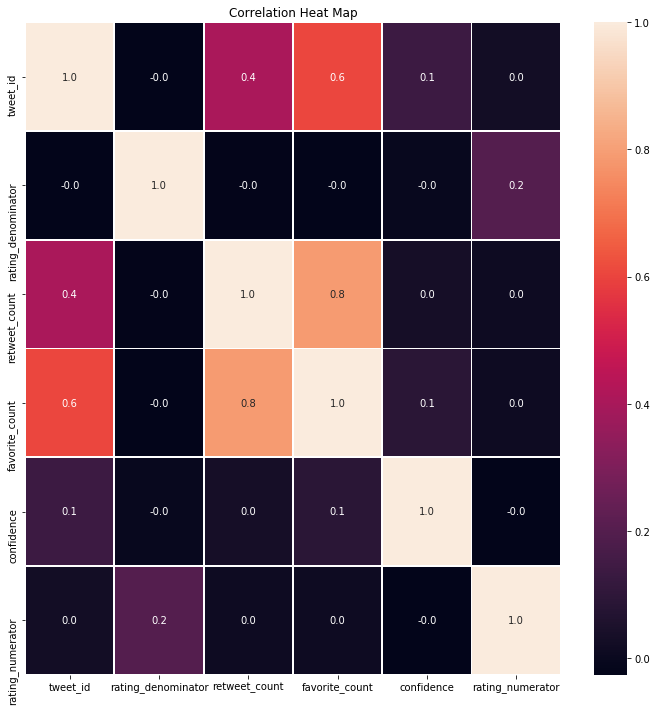

In [95]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df[['tweet_id','rating_denominator','retweet_count','favorite_count','confidence',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

#### Analyses
Strong correlation between retweet_count and favorite_count, this is expected.

(-1.2887102479682495,
 1.2343046943689684,
 -1.2313658955919742,
 1.2104504186914997)

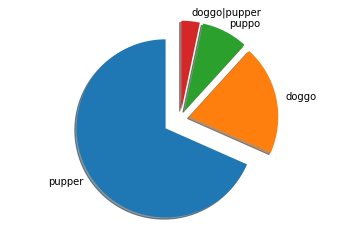

In [97]:
life_stage_count = list(df[df['stage'] != 'None']['stage'].value_counts())[0:4]
life_stages = df[df['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

#### Analyses
Dogs in Pupper stage of dog life cycle get most tweets, which is expected.

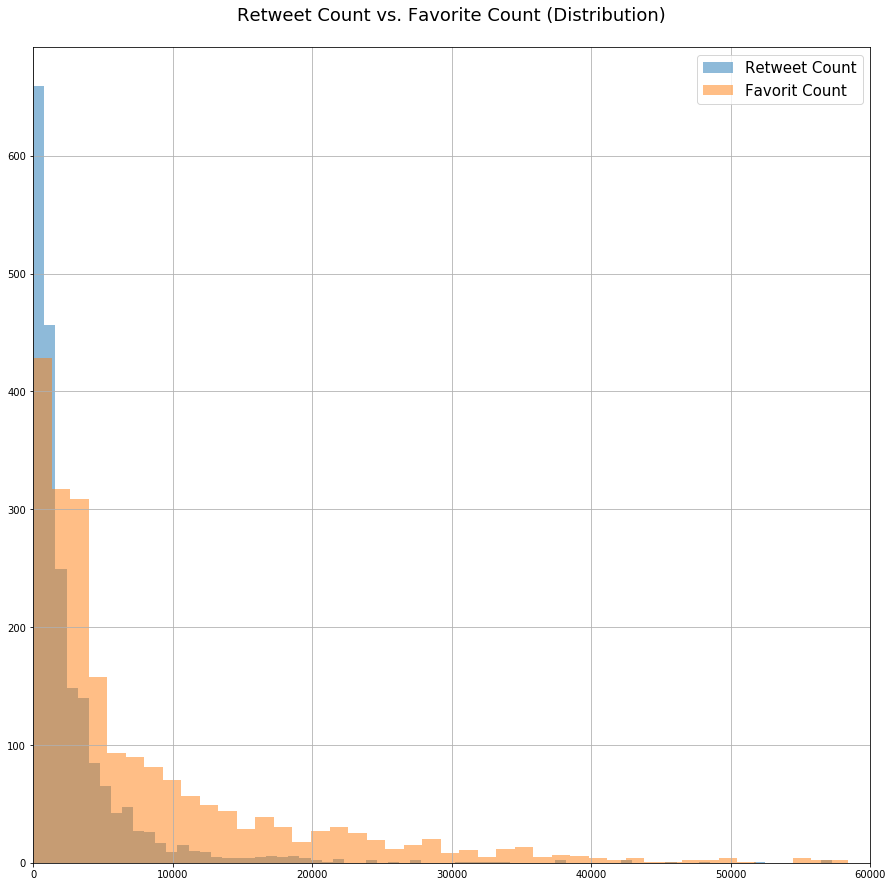

In [88]:
plt.figure(figsize=(15,15))
df.retweet_count.hist(alpha=0.5, bins=100, label='Retweet Count')
df.favorite_count.hist(alpha=0.5, bins=100, label='Favorit Count')
plt.title('Retweet Count vs. Favorite Count (Distribution)\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show()

In [89]:
df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2073.000000,2073.000000
mean,2976.089243,8556.718283
std,5054.897526,12098.640994
min,16.000000,0.000000
25%,634.000000,1674.000000
50%,1408.000000,3864.000000
75%,3443.000000,10937.000000
max,79515.000000,132810.000000


Looking at the histogram above, we note that the distribution of both retweets and favorit is significantly right-skewed, however, the mean of favorite count (8863.2) is greater than retweet count (2722.6). We also note that the maximum number of favorite a tweet received was 143573, where the maximum number of retweets a tweet received was 77,488.

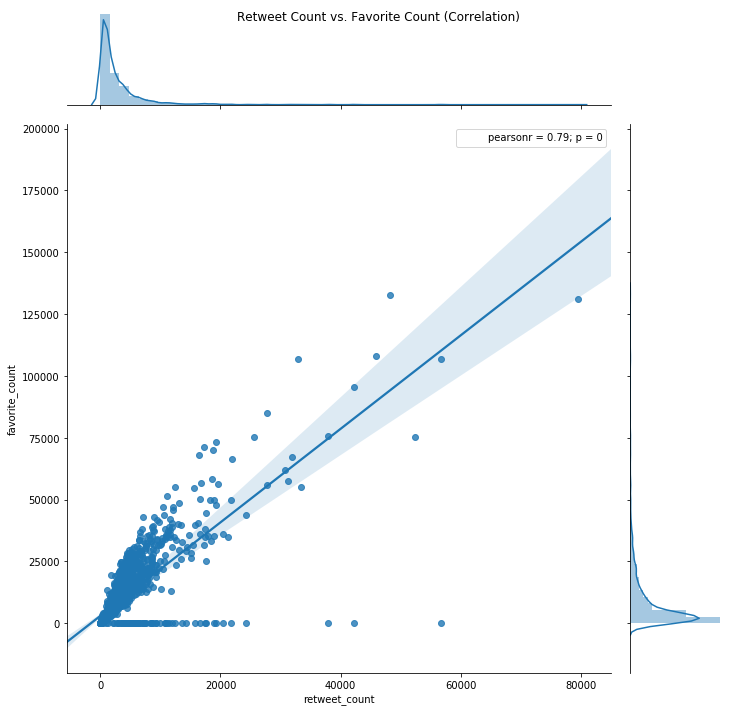

In [98]:
p = sns.jointplot(x=df.retweet_count,y=df.favorite_count, size=10, kind='reg');
p.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');


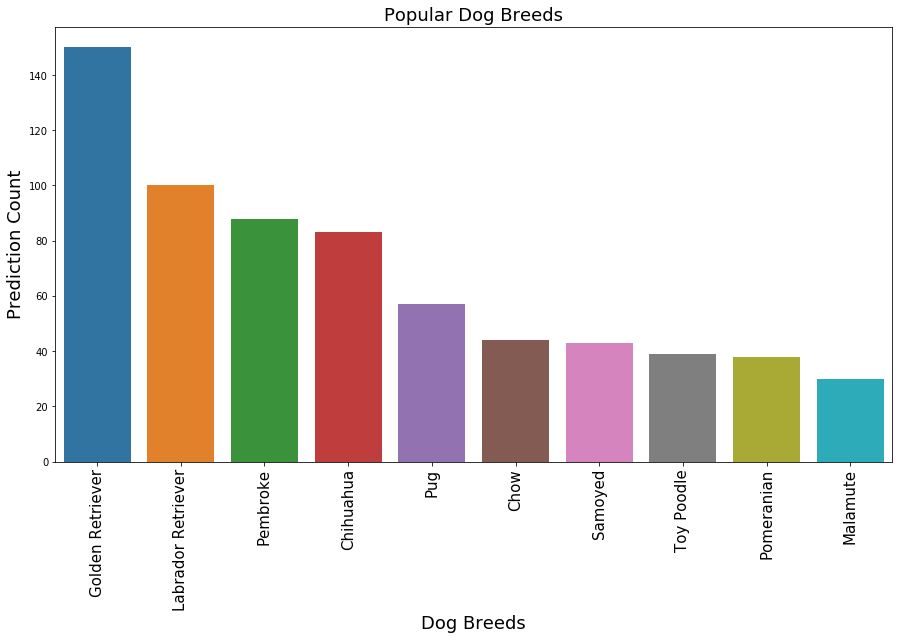

In [100]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = df['first_prediction'].value_counts()[0:10].index,
            y =df['first_prediction'].value_counts()[0:10],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);

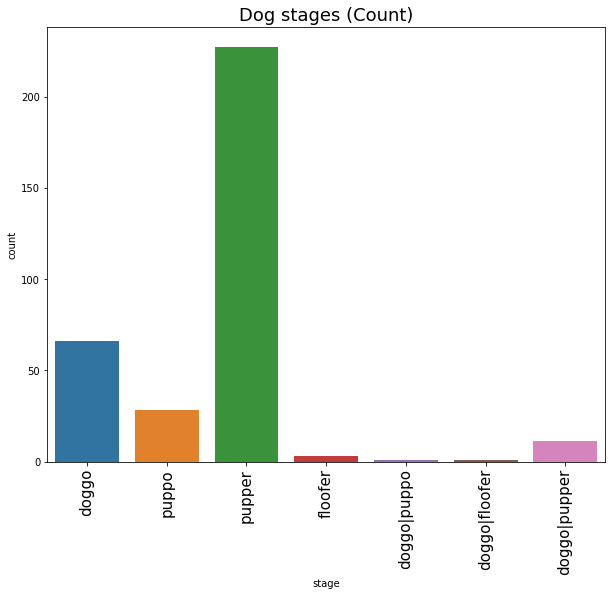

In [101]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=df, x='stage')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.title("Dog stages (Count)",fontsize = 18);


In [102]:
df.stage.value_counts()

pupper           227
doggo             66
puppo             28
doggo|pupper      11
floofer            3
doggo|floofer      1
doggo|puppo        1
Name: stage, dtype: int64

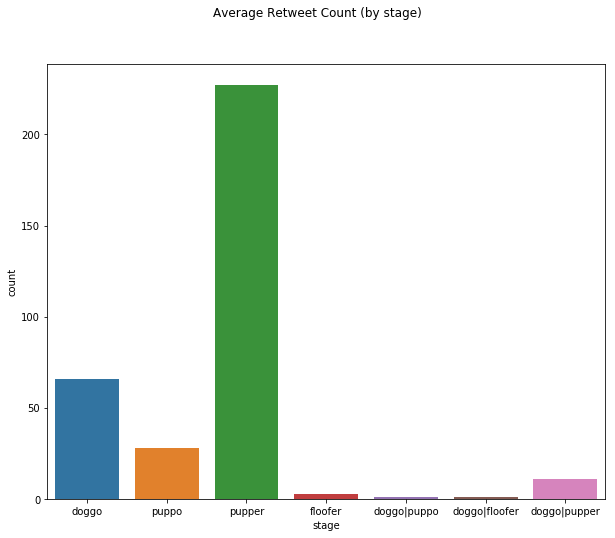

In [104]:
plt.figure(figsize = (10,8))
ax=sns.countplot(data=df, x='stage')
ax.figure.suptitle('Average Retweet Count (by stage)');


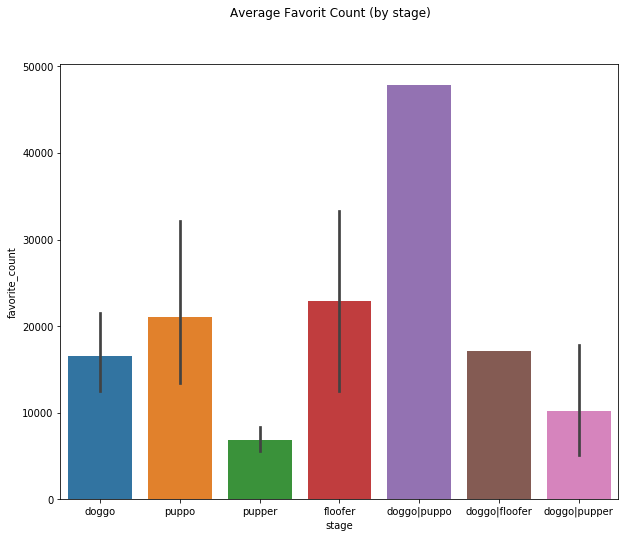

In [105]:
plt.figure(figsize = (10,8))
ax=sns.barplot(data=df, x='stage', y='favorite_count')
ax.figure.suptitle('Average Favorit Count (by stage)');

Looking at the plots above, we note the following:

The pupper stage has the highest count where the (doggo|floofer) and (doggo|puppo) has the lowest count.
The average retweet_count for (doggo|puppo) is the highest (greater than 17,500 retweets), where the average retweet_count for the pupper is the lowest (less than 2,500).
Similarly, the average favorite_count for (doggo|puppo) stage has the highest average favorit_count, where the pupper has the lowest average favorite count.